In [1]:
# ECE 561 - Jackson Hellmers
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
from matplotlib import pyplot as plt

# load data and split into training and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype(float)
y_train = y_train.astype(float)
x_test = x_test.astype(float)
y_test = y_test.astype(float)

# note x_train is a numpy array with size (60000, 28 28)
print(np.shape(x_train))
print(np.shape(x_test))

# for this assignment, only use the first 2000 training examples
x_train = x_train[0:2000,:,:]
y_train = y_train[0:2000]

(60000, 28, 28)
(10000, 28, 28)


The image displayed is an '8'
The label for the image displayed is 8


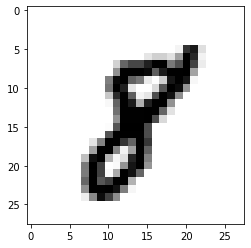

In [2]:
# Prob. 1
# note that you can access the ith image in x_train as x_train[i-1,:,:]
# use plt.imshow(the_image, cmap=plt.cm.gray_r) to display image

img_18 = x_train[17,:,:]
plt.imshow(img_18, cmap=plt.cm.gray_r)

print("The image displayed is an '8'")
print("The label for the image displayed is",int(y_train[17]))

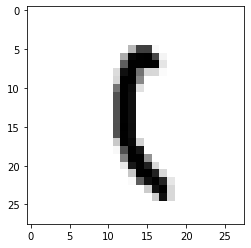

Label: 1


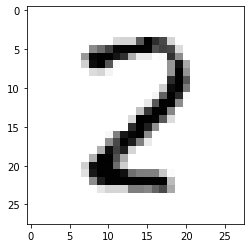

Label: 2


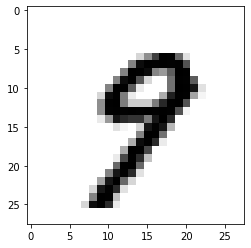

Label: 9


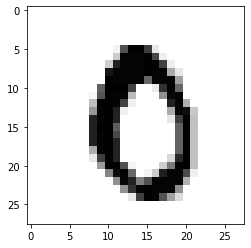

Label: 0


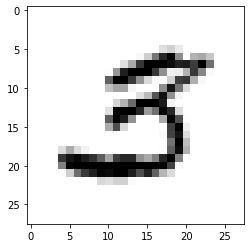

Label: 3


In [3]:
# Prob. 2
for i in range(5):
    toShow = random.randint(0,len(y_train))
    plt.imshow(x_train[toShow,:,:], cmap=plt.cm.gray_r)
    plt.show()
    print("Label:",int(y_train[toShow]))


### Question 3

In [4]:
## Part A 

## nearest neighbor classifier
def f(_x):
    assert np.shape(_x)==np.shape(x_train[0]) #check to make sure input is a single 28x28 np array 
    distances = [np.linalg.norm(_x-x_train[i]) for i in range(len(y_train))] #calculate distance as pixel difference
    nearest_neighbor = np.argmin(distances) #find index of smallest distance
    return (y_train[nearest_neighbor], nearest_neighbor)  #return the label of the nearest neighbor, and index

In [5]:
## Part B

[label,index] = f(x_test[0])
correct = int(label)==int(y_test[0]) #check if prediction correct
misclass_loss = 0 if correct else 1 #calculate misclassification loss
norm_loss = np.linalg.norm(y_train[index]-y_test[0])**2 #calculate square error loss

print("Label of Actual and Predicted Match:",correct)
print("Predicted Label:",label)
print("Actual Label",y_test[0])
print("Misclassification Loss:",misclass_loss)
print("Squared Error:",norm_loss)

Label of Actual and Predicted Match: True
Predicted Label: 7.0
Actual Label 7.0
Misclassification Loss: 0
Squared Error: 0.0


In [6]:
## Part C

misclass_sum = 0
norm_sum = 0
incorrect = np.array([[],[]])
num_classifications = 1000
for i in range(num_classifications): #predict first 1000 elements of test data
    [label,index] = f(x_test[i])
    correct = int(label)==int(y_test[i])
    if not correct:
        misclass_sum += 1
        incorrect = np.append(incorrect,[[i],[index]],axis=1) #append the index of the incorrect predicition
    norm_sum += np.linalg.norm(y_train[index]-y_test[i])**2
misclass_emp = misclass_sum/num_classifications
norm_emp = norm_sum/num_classifications
print("Empirical Misclassification Loss",misclass_emp)
print("Empirical Square Error Loss",norm_emp)

Empirical Misclassification Loss 0.127
Empirical Square Error Loss 2.103


Actual Image on Left Nearest Neighbor on Right


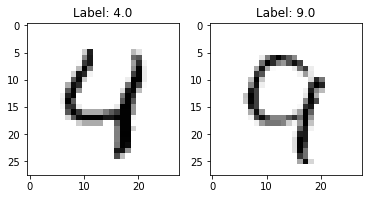

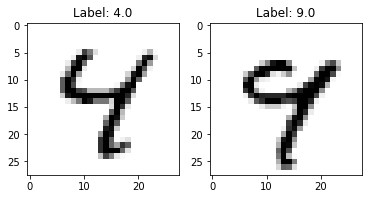

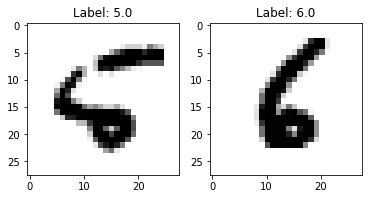

In [7]:
## Part D

print("Actual Image on Left Nearest Neighbor on Right")
for j in range(3):
    actual = x_test[int(incorrect[0,j])]
    neighbor = x_train[int(incorrect[1,j])]
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(actual, cmap=plt.cm.gray_r)
    plt.title("Label: "+str(y_test[int(incorrect[0,j])]))
    f.add_subplot(1,2, 2)
    plt.imshow(neighbor, cmap=plt.cm.gray_r)
    plt.title("Label: "+str(y_train[int(incorrect[1,j])]))
    plt.show(block=True)
    

In [8]:
# It is clear once visualizing the images how they were incorrectly predicted.
# Many contain similar features and have a lot of overlap in size and curvature.
# For some of the images I myself would have a hard time correctly labeling the image.

# This exemplifies one of the draw backs of using nearest neighbors classification. As images
# may have a large overlap in which pixels are on/off but contain different information.

### Question 4

In [9]:
## k nearest neighbors classifier
def knn(_x,k):
    assert np.shape(_x)==np.shape(x_train[0]) #check to make sure input is a single 28x28 np array
    distances = [np.linalg.norm(_x-x_train[i]) for i in range(len(y_train))]
    distances = np.array(distances)
    distance_sorted = distances.argsort()
    distances_min = distance_sorted[0:k]
    return np.argmax(np.bincount(y_train[distances_min].astype(int))) #return the label of most occuring neighbor

In [10]:
misclass_sum = 0
square_error_sum = 0
num_classifications = 1000
k = 10
for i in range(num_classifications):
    pred_label = knn(x_test[i],k)
    misclass_sum += 0 if (pred_label==int(y_test[i])) else 1
    square_error_sum += np.linalg.norm(pred_label-y_test[i])**2
misclass_emp = misclass_sum/num_classifications
square_error_emp = square_error_sum/num_classifications
print("Empirical Misclassification Loss",misclass_emp)
print("Square Error Loss",square_error_emp)

Empirical Misclassification Loss 0.136
Square Error Loss 2.394
